In [7]:
# ========================================
# 📱 Mobile Price Prediction System
# ========================================
# Author: Kalpana Sinha 
# Dataset: ndtv_dataset.csv
# ========================================


In [10]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Advanced Models
from xgboost import XGBRegressor
try:
    from lightgbm import LGBMRegressor
except ModuleNotFoundError:
    print("⚠ LightGBM is not installed. Run: pip install lightgbm")
    LGBMRegressor = None

# Saving Model
import joblib



⚠ LightGBM is not installed. Run: pip install lightgbm


In [11]:
# Load dataset
df = pd.read_csv("ndtv_dataset.csv")

print("Dataset Shape:", df.shape)
display(df.head())

# Dataset info
print("\nDataset Information:")
print(df.info())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (988, 22)


,3G,4g/ Lte,Battery capacity (mAh),Battery capacity (mAh) (bin),Bluetooth,Brand,F1,Front camera,GPS,Internal storage (GB),...,Processor,Ram (Mb),Rear camera,Resolution,Resolution x,Resolution y,Screen size (inches),Touchscreen,Wi-Fi,Price
0,Yes,Yes,4000,4000,Yes,Realme,1,16.0,Yes,64,...,8,6000,64,1080X2400,1080,2400,6.50,Yes,Yes,27999
1,Yes,Yes,3765,3500,Yes,Oppo,10,16.0,Yes,64,...,8,6000,16,1080X2340,1080,2340,6.50,Yes,Yes,23990
2,Yes,Yes,3765,3500,Yes,Realme,11,16.0,Yes,128,...,8,4000,48,1080X2340,1080,2340,6.53,Yes,Yes,14999
3,Yes,Yes,4045,4000,Yes,Realme,15,25.0,Yes,64,...,8,4000,16,1080X2340,1080,2340,6.30,Yes,Yes,13999
4,Yes,Yes,4000,4000,Yes,Xiaomi,17,13.0,Yes,64,...,8,4000,48,1080X2340,1080,2340,6.30,Yes,Yes,9799



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   3G                            988 non-null    object 
 1   4g/ Lte                       988 non-null    object 
 2   Battery capacity (mAh)        988 non-null    int64  
 3   Battery capacity (mAh) (bin)  988 non-null    int64  
 4   Bluetooth                     988 non-null    object 
 5   Brand                         988 non-null    object 
 6   F1                            988 non-null    int64  
 7   Front camera                  988 non-null    float64
 8   GPS                           988 non-null    object 
 9   Internal storage (GB)         988 non-null    int64  
 10  Number of SIMs                988 non-null    int64  
 11  Operating system              988 non-null    object 
 12  Processor                     988 non-null

In [12]:
# Drop rows with missing values
df = df.dropna()

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

display(df.head())


,3G,4g/ Lte,Battery capacity (mAh),Battery capacity (mAh) (bin),Bluetooth,Brand,F1,Front camera,GPS,Internal storage (GB),...,Processor,Ram (Mb),Rear camera,Resolution,Resolution x,Resolution y,Screen size (inches),Touchscreen,Wi-Fi,Price
0,1,1,4000,4000,1,31,1,16.0,1,64,...,8,6000,64,9,1080,2400,6.50,1,1,27999
1,1,1,3765,3500,1,29,10,16.0,1,64,...,8,6000,16,8,1080,2340,6.50,1,1,23990
2,1,1,3765,3500,1,31,11,16.0,1,128,...,8,4000,48,8,1080,2340,6.53,1,1,14999
3,1,1,4045,4000,1,31,15,25.0,1,64,...,8,4000,16,8,1080,2340,6.30,1,1,13999
4,1,1,4000,4000,1,37,17,13.0,1,64,...,8,4000,48,8,1080,2340,6.30,1,1,9799


Available columns: ['3G', '4g/ Lte', 'Battery capacity (mAh)', 'Battery capacity (mAh) (bin)', 'Bluetooth', 'Brand', 'F1', 'Front camera', 'GPS', 'Internal storage (GB)', 'Number of SIMs', 'Operating system', 'Processor', 'Ram (Mb)', 'Rear camera', 'Resolution', 'Resolution x', 'Resolution y', 'Screen size (inches)', 'Touchscreen', 'Wi-Fi', 'Price']


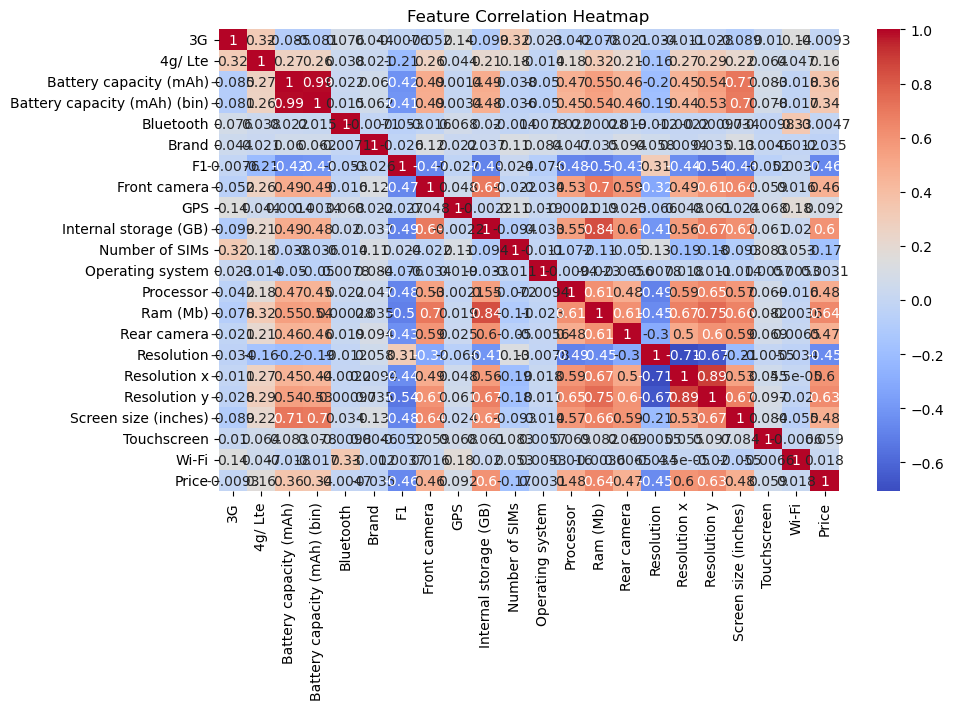

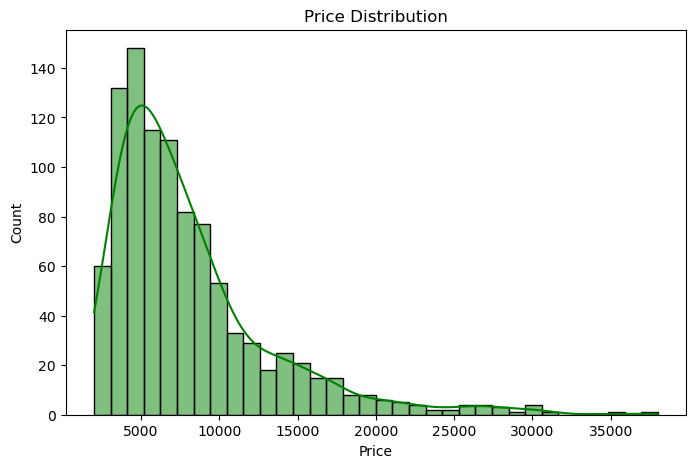

⚠ One or more columns ['RAM', 'Price', 'Brand'] not found for scatter plot.


In [14]:
# Check available columns
print("Available columns:", df.columns.tolist())

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Price Distribution (only if 'Price' column exists)
if 'Price' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Price'], kde=True, color='green')
    plt.title("Price Distribution")
    plt.show()
else:
    print("⚠ Column 'Price' not found for histogram.")

# Scatter Plot Example (only if all columns exist)
if all(col in df.columns for col in ['RAM', 'Price', 'Brand']):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='RAM', y='Price', data=df, hue='Brand')
    plt.title("RAM vs Price")
    plt.show()
else:
    print("⚠ One or more columns ['RAM', 'Price', 'Brand'] not found for scatter plot.")



In [15]:
# Features & Target
X = df.drop("Price", axis=1)
y = df["Price"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
# Models
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
xgb = XGBRegressor(random_state=42)

lgb = None
if LGBMRegressor is not None:
    lgb = LGBMRegressor(random_state=42)

# Train
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
xgb.fit(X_train, y_train)

if lgb is not None:
    lgb.fit(X_train, y_train)



In [18]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2


In [20]:
models = {
    "Linear Regression": lr,
    "Ridge Regression": ridge,
    "Lasso Regression": lasso,
    "XGBoost": xgb,
    "LightGBM": lgb
}

for name, model in models.items():
    if model is None:
        print(f"⚠ Skipping {name} (not available)")
        continue
    mae, rmse, r2 = evaluate_model(model, X_test, y_test)
    print(f"{name} => MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")



Linear Regression => MAE: 2298.50, RMSE: 3283.80, R²: 0.55
Ridge Regression => MAE: 2294.69, RMSE: 3281.55, R²: 0.55
Lasso Regression => MAE: 2298.24, RMSE: 3283.69, R²: 0.55
XGBoost => MAE: 2299.13, RMSE: 3520.54, R²: 0.48
⚠ Skipping LightGBM (not available)


In [21]:
# Example: Predict for first row
sample_input = np.array([X.iloc[0]])
sample_input = scaler.transform(sample_input)
predicted_price = lr.predict(sample_input)
print("\nPredicted Price (Linear Regression) for sample:", predicted_price[0])



Predicted Price (Linear Regression) for sample: 18488.629219713734


c:\Users\Kalpana\OneDrive\Desktop\python\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
joblib.dump(lr, "mobile_price_predictor.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and Scaler saved successfully!")


Model and Scaler saved successfully!
